### Loading Data for Construction Spending

In addition to loading the data, I also chose to rename several columns for easier use later on.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime as dt
from scipy import stats

df = pd.read_csv('C:\\Users\\drh4u\\OneDrive\\Documents\\W&M Fall 2020\\BUAD 5112\\M3\\ConstructionTimeSeriesDatav2.csv')
df = df.rename(columns = {'Month-Year': 'Date','Total Construction': 'Total', 'Private Construction': 'Private', 'Public Construction': 'Public'})
df.head(10)

,Month,Date,Total,Private,Public
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375
5,6,Jun-02,77182,57801,19381
6,7,Jul-02,78863,58494,20369
7,8,Aug-02,79460,57953,21507
8,9,Sep-02,76542,55157,21385
9,10,Oct-02,75710,56023,19687


### Initial Plot of Time Series

In looking at the initial plot, I immediately notice the visual correlation between Private and Total Construction spending. This would seem obvious given the contribution Private has to Total construction spending, but I thought it would be useful to see the actual strength of this correlation and present that.

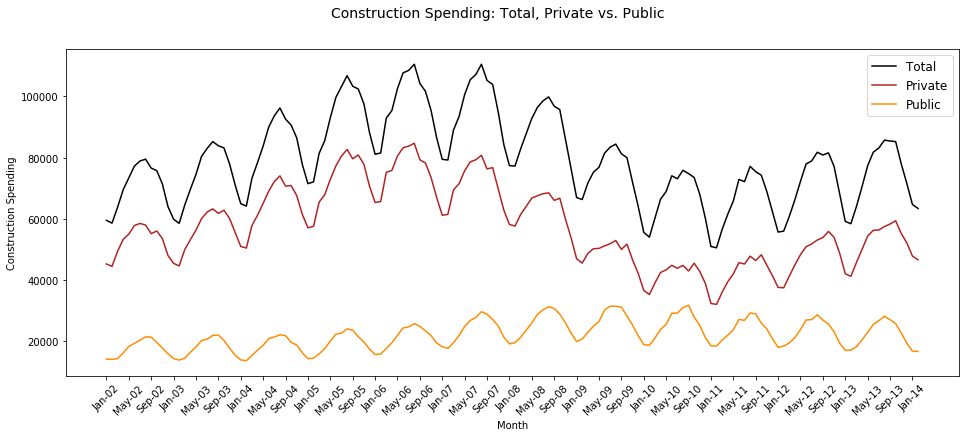

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(16,6)
fig.suptitle('Construction Spending: Total, Private vs. Public', fontsize = 14)

plt.plot(df.Date, df.Total, color = 'black', label = 'Total')
plt.plot(df.Date, df.Private, color = 'firebrick', label = 'Private')
plt.plot(df.Date, df.Public, color = 'darkorange', label = 'Public')
ax.set_ylabel('Construction Spending')
ax.set_xlabel('Month')
plt.xticks(rotation=45)
ax.set_xticks(df.Date[::4])
ax.set_xticklabels(df.Date[::4])
ax.legend(loc = 1, fontsize = 12)
plt.show()

### Calculating the Correlation of Both Private and Public Construction to Total and Generating Lines of Best Fit

In [8]:
x = df['Private']
y = df['Total']
z = df['Public']
private_r = '{:1.3f}'.format(x.corr(y))
public_r = '{:1.3f}'.format(z.corr(y))
print('The correlation between Private and Total Construction is ' + str(private_r) + ' while the correlation between Public and Total is ' + str(public_r) + '.')

The correlation between Private and Total Construction is 0.945 while the correlation between Public and Total is 0.448.


In [11]:
m_private, b_private = np.polyfit(x,y,1)  # line of best fit between Private and Total
m_public, b_public = np.polyfit(z,y,1)  # ' ' for Public and Total

### Presentation Visual

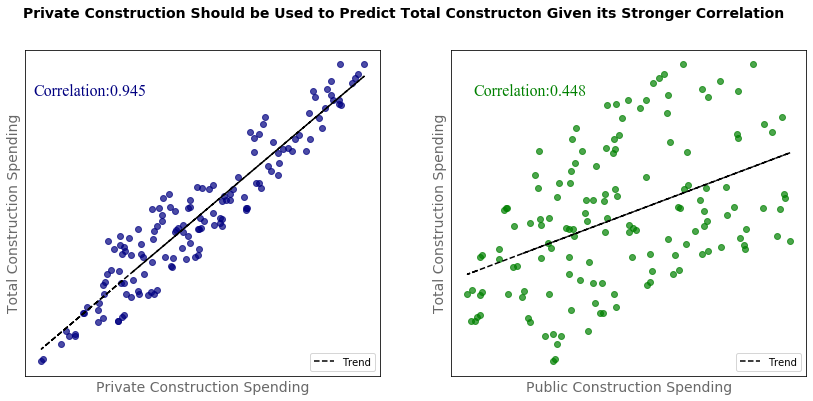

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(14,6)
fig.suptitle('Private Construction Should be Used to Predict Total Constructon Given its Stronger Correlation', fontweight = 'bold', fontsize = 14, ha = 'center')

ax[0].scatter(x, y, alpha=0.7, c = 'navy')    # the 'alpha' parameter controls dot opacity
ax[0].plot(x,x*m_private + b_private, label = 'Trend', linestyle = 'dashed', color = 'black')  #line of best fit
ax[0].xaxis.set_label_text('Private Construction Spending', fontsize = 14, c = 'dimgray')
ax[0].yaxis.set_label_text('Total Construction Spending', fontsize = 14, c = 'dimgray')
ax[0].text(40000,105000,'Correlation:' + str(private_r),fontsize=16,va='center',ha='center',fontname='Times New Roman', color = 'navy')
ax[0].set_yticklabels(['{:,}'.format(y/1000) for y in ax[0].get_yticks()])
ax[0].axes.xaxis.set_ticks([])
ax[0].axes.yaxis.set_ticks([])
ax[0].legend(loc = 4)

ax[1].scatter(z, y, alpha=0.7, c = 'green')    # the 'alpha' parameter controls dot opacity
ax[1].plot(z,z*m_public + b_public, label = 'Trend', linestyle = 'dashed', color = 'black')  #line of best fit
ax[1].xaxis.set_label_text('Public Construction Spending', fontsize = 14, c = 'dimgray')
ax[1].yaxis.set_label_text('Total Construction Spending', fontsize = 14, c = 'dimgray')
ax[1].text(14000,105000,'Correlation:' + str(public_r), fontsize=16, va='center', ha='left', fontname='Times New Roman', color = 'green')
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])
ax[1].legend(loc = 4)

plt.show()